Jack Li Homework 2

In [1]:
sys.path.append("/workspace/.pyenv_mirror/user/3.8.13/lib/python3.8/site-packages")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import seaborn as sns
logreg = LogisticRegression()

In [2]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Text(0, 0.5, 'totlngth')

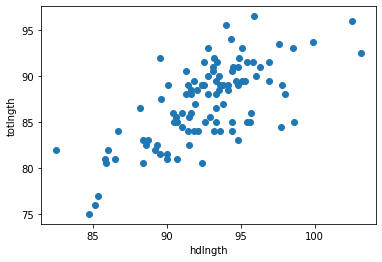

In [3]:
plt.scatter(df['hdlngth'], df['totlngth']) # graphing head length to total length
plt.xlabel("hdlngth")
plt.ylabel("totlngth")

Question 1

In [4]:
x = df['hdlngth']
y = df ['totlngth']
stats.linregress(x, y)


LinregressResult(slope=0.8336697990278819, intercept=9.888233331751707, rvalue=0.6910936973935056, pvalue=4.680578654379419e-16, stderr=0.08632851506979797, intercept_stderr=8.000161952399203)

In [5]:
# Definition for linear line function
def linear_line(x, m, b):
    y = m*x + b
    return y

In [6]:
opt, cov = curve_fit(linear_line, x, y)
print(opt)
print(cov)

[0.8336698  9.88823298]
[[ 7.45261273e-03 -6.90133423e-01]
 [-6.90133423e-01  6.40025906e+01]]


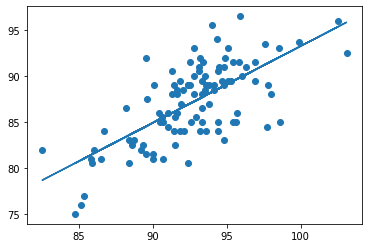

In [7]:
plt.scatter(x, y)# makes a regression line in the form of a line
plt.plot(x, linear_line(x, opt[0], opt[1]))

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# gets the predicted y values for each x
y_pred = linear_line(x, *opt)

# prints the r-squared and mean squared error between actual y and predicted y
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.4776104985770262
9.613102791518653


Question 1: The graph describes the data in way that is pretty poorly since there seems to be a lot of data points from the line, but it does follow the overall trend pretty well.

In [9]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [10]:
df_male = df.loc[df['sex'] == 'm']
df_female = df.loc[df['sex'] == 'f']

#spliting data to female and male data

In [11]:
x_male = df_male['hdlngth']
y_male = df_male['totlngth']
x_female = df_female['hdlngth']
y_female = df_female ['totlngth']
# setting the data so each fe/male data set

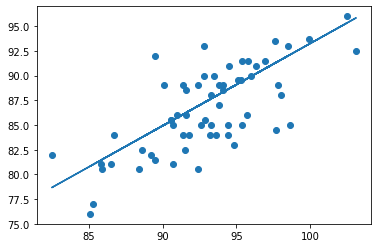

In [12]:
plt.scatter(x_male, y_male)
plt.plot(x_male, linear_line(x_male, opt[0], opt[1]))

In [13]:
y_pred = linear_line(x_male, *opt)


print(r2_score(y_male, y_pred))
print(mean_squared_error(y_male, y_pred))

0.47116267487586594
9.797205323147594


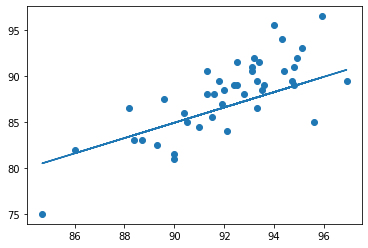

In [14]:
plt.scatter(x_female, y_female)
plt.plot(x_female, linear_line(x_female, opt[0], opt[1]))

In [15]:
y_pred = linear_line(x_female, *opt)

print(r2_score(y_female, y_pred))
print(mean_squared_error(y_female, y_pred))

0.4526029275679738
9.351934083858993


Quesion 2: The data doesn't vary much from male to female possums. So the regression line doesn't increase or decrease in accuracy.

In [16]:
df=df.dropna()

In [17]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [18]:
train, test=train_test_split(df,test_size=0.2,random_state=0)
x_train = train[['hdlngth', 'skullw', 'taill','footlgth','earconch','eye','chest','belly']].values
y_train = train['totlngth'].values

x_test = test[['hdlngth', 'skullw', 'taill','footlgth','earconch','eye','chest','belly']].values
y_test = test['totlngth'].values
# splitting the data up to train and test data

In [19]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [20]:
print(lasso.coef_)


[ 0.40603389  0.01766472  1.03680197  0.33887332 -0.00992912  0.
  0.02766717  0.01466936]


Quesion 3: The best 3 classifier is tail length, head length, and earconch.

In [21]:
df['sex'].replace(['m', 'f'], #Replaces the qualitative data with qualitative data
                        [0,1], inplace=True)

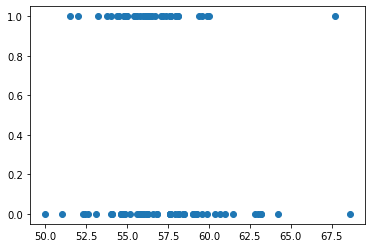

In [22]:
plt.scatter(df['skullw'],df['sex'])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df["skullw"],df["sex"],test_size=0.2,random_state=0)
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [24]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
from scipy.special import expit
x_line = np.linspace(30,110,1000)
y_line = x_line * logreg.coef_ + logreg.intercept_
sigmoid = expit(y_line)


Text(0, 0.5, 'sex')

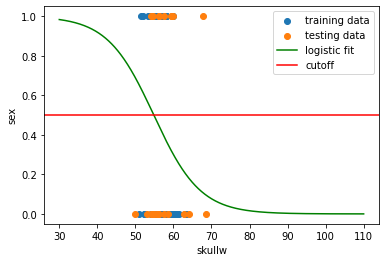

In [25]:

plt.scatter(x_train, y_train, label="training data")
plt.scatter(x_test, y_test, label="testing data")
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend()
plt.xlabel("skullw")
plt.ylabel("sex")

In [26]:
from sklearn import metrics
y_pred = logreg.predict(x_test)

In [27]:

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[8 5]
 [6 2]]


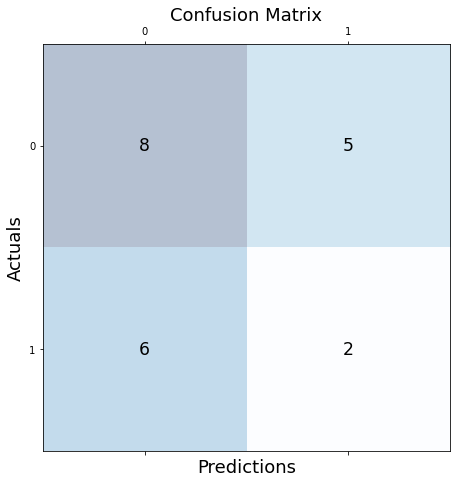

In [28]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:

knn_train=knn.predict(x_train)
knn_test=knn.predict(x_test)

In [31]:
from sklearn.cluster import KMeans 


In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)

In [33]:
kmeans_train = kmeans.fit_predict(x_train)
kmeans_test = kmeans.fit_predict(x_test)

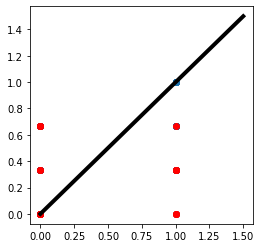

In [34]:
plt.figure(figsize=(4,4))

plt.scatter(y_train,knn_train)
plt.scatter(y_test,knn_test,color='r')
plt.plot([0,1.5],[0,1.5],lw=4,color='black')

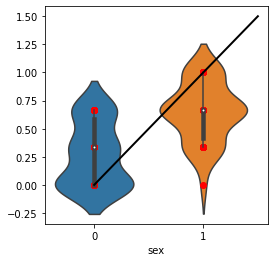

In [35]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_train,y=knn_train,data=df, xlim=[0,3])
plt.scatter(y_train,knn_train,color='r')
plt.plot([0,1.5],[0,1.5],lw=2,color='black')


This was my attempt to question 4 and 5 with kmeans logistic regression